<a href="https://colab.research.google.com/github/JaimeGuandinango/jguandinangoExamen/blob/master/AbejasRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pylab as plt


In [28]:
listaPuntos= [(0,1), (2,5), (5,6),(5,4), (1,2),(2,3), (2,7)] #rutas al panal

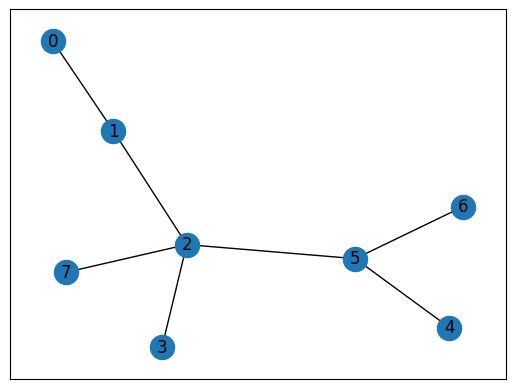

In [29]:
objetivo =7
import networkx as nx  #libreria de redes graphos
g=nx.Graph()
g.add_edges_from(listaPuntos)
pos=nx.spring_layout(g)

nx.draw_networkx_nodes(g, pos)  #organizar nodos
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos)
plt.show()

In [22]:
MATRIX_SIZE=8


In [33]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))

In [34]:
R *=-1

In [54]:
for punto in listaPuntos:
  print(punto)
  if punto [1]== objetivo:
    R[punto]= 100
  else:
    R[punto]= 0

if punto(0)==objetivo:
    R[punto[::-1]]=100
else:
    R[punto[::-1]]=0


R[objetivo, objetivo] =100


(0, 1)
(2, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


TypeError: ignored

In [ ]:
R

In [55]:
Q= np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gama = 0.8             #correcciones
estadoInicial =1       #punto de partida

In [56]:
def accionesPosibles(estado):
  estadoActual_fila = R[estado]
  acAvance = np.where(estadoActual_fila >=0)[1]
  
  return acAvance

In [57]:
acDisponible = accionesPosibles(estadoInicial)

In [58]:
def pruebaSiguienteAccion(rangoAccionesPosibles):
  acSiguiente = int(np.random.choice(acDisponible,1))
  return acSiguiente

In [59]:
accion= pruebaSiguienteAccion(acDisponible)


In [65]:
def actualizar (estadoActual, accion, gama):
  indiceMayor= np.where(Q [accion,]==np.max(Q[accion,]))[1]
  if indiceMayor.shape[0]>1:
    indiceMayor= int(np.random.choice(indiceMayor, size=1))
  else:
    indiceMayor= int(indiceMayor)

  valorMaximo= Q[accion, indiceMayor]

  Q[estadoActual, accion] = R[estadoActual, accion]+ gama* valorMaximo
  
  print('valorMaximo', R[estadoActual, accion]+gama*valorMaximo)

  if (np.max(Q)>0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return 0

In [ ]:
actualizar(estadoInicial, accion, gama)

In [ ]:
puntajes=[]
for i in range(700):
   estadoActual= np.random.randint(0, int(Q.shape[0]))
   acDisponible= accionesPosibles(estadoActual)
   accion= pruebaSiguienteAccion(acDisponible)
   puntaje= actualizar(estadoActual, accion, gama)
   puntajes.append(puntaje)

print(Q/np.max(Q)*100)

In [74]:
estadoActual= 0
pasos= [estadoActual]

while estadoActual !=7 :
  indiceSiguientePaso= np.where(Q[estadoActual,] == np.max(Q[estadoActual,]))[1]

if indiceSiguientePaso.shape[0]> 1:
  indiceSiguientePaso= int(np.random.choice(estadoActual, size=1))
else:
    indiceSiguientePaso= int(indiceSiguientePaso)
    estadoActual= indiceSiguientePaso


print("camino eficiente")

print(pasos)

plt.plot(puntajes)
plt.show()

NameError: ignored